In [13]:
from datapackage import Package

In [14]:
package = Package('https://datahub.io/core/sea-level-rise/datapackage.json')

In [3]:
for resource in package.resource_names:
    print(resource)

validation_report
csiro_alt_gmsl_mo_2015_csv
csiro_alt_gmsl_yr_2015_csv
csiro_recons_gmsl_mo_2015_csv
csiro_recons_gmsl_yr_2015_csv
epa-sea-level_csv
csiro_alt_gmsl_mo_2015_json
csiro_alt_gmsl_yr_2015_json
csiro_recons_gmsl_mo_2015_json
csiro_recons_gmsl_yr_2015_json
epa-sea-level_json
sea-level-rise_zip
csiro_alt_gmsl_mo_2015
csiro_alt_gmsl_yr_2015
csiro_recons_gmsl_mo_2015
csiro_recons_gmsl_yr_2015
epa-sea-level


In [4]:
sea_level_resource = package.get_resource('csiro_recons_gmsl_mo_2015_csv') 

In [5]:
sea_level_data = sea_level_resource.read()

In [6]:
import pandas as pd
df = pd.DataFrame(sea_level_data)

In [7]:
df.columns = ['date', 'global_mean_sea_level', 'uncertainty']
df.head()

,date,global_mean_sea_level,uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
date                     1608 non-null object
global_mean_sea_level    1608 non-null object
uncertainty              1608 non-null object
dtypes: object(3)
memory usage: 37.8+ KB


In [9]:
df['date'] = pd.to_datetime(df['date'])
df['global_mean_sea_level'] = pd.to_numeric(df['global_mean_sea_level'])
df['uncertainty'] = pd.to_numeric(df['uncertainty'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
date                     1608 non-null datetime64[ns]
global_mean_sea_level    1608 non-null float64
uncertainty              1608 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 37.8 KB


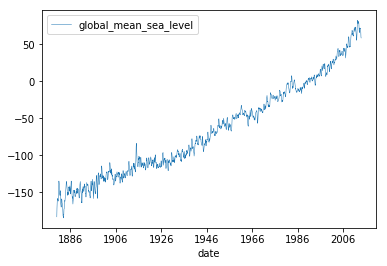

In [12]:
import matplotlib.pyplot as plt
ax = plt.gca()
df.plot(subplots=True, kind='line', x='date', y='global_mean_sea_level', ax=ax, linewidth=0.5)
# plt.show()
plt.savefig('sea_level_rise.png', bbox_inches='tight')